# Analyzing a bank's churn and making a deep learning model for prediction and future analysis!

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.losses import BinaryCrossentropy
from keras.losses import MeanSquaredError

In [2]:
data = pd.read_csv('Bank_Customer_Churn_Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


#### Converting object type to int

In [4]:
encoder = LabelEncoder()
data['country'] = encoder.fit_transform(data['country'])
data['gender'] = encoder.fit_transform(data['gender'])
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.drop('customer_id', axis=1, inplace=True)

### Ploting datas in order to get a better understanding of the dataset

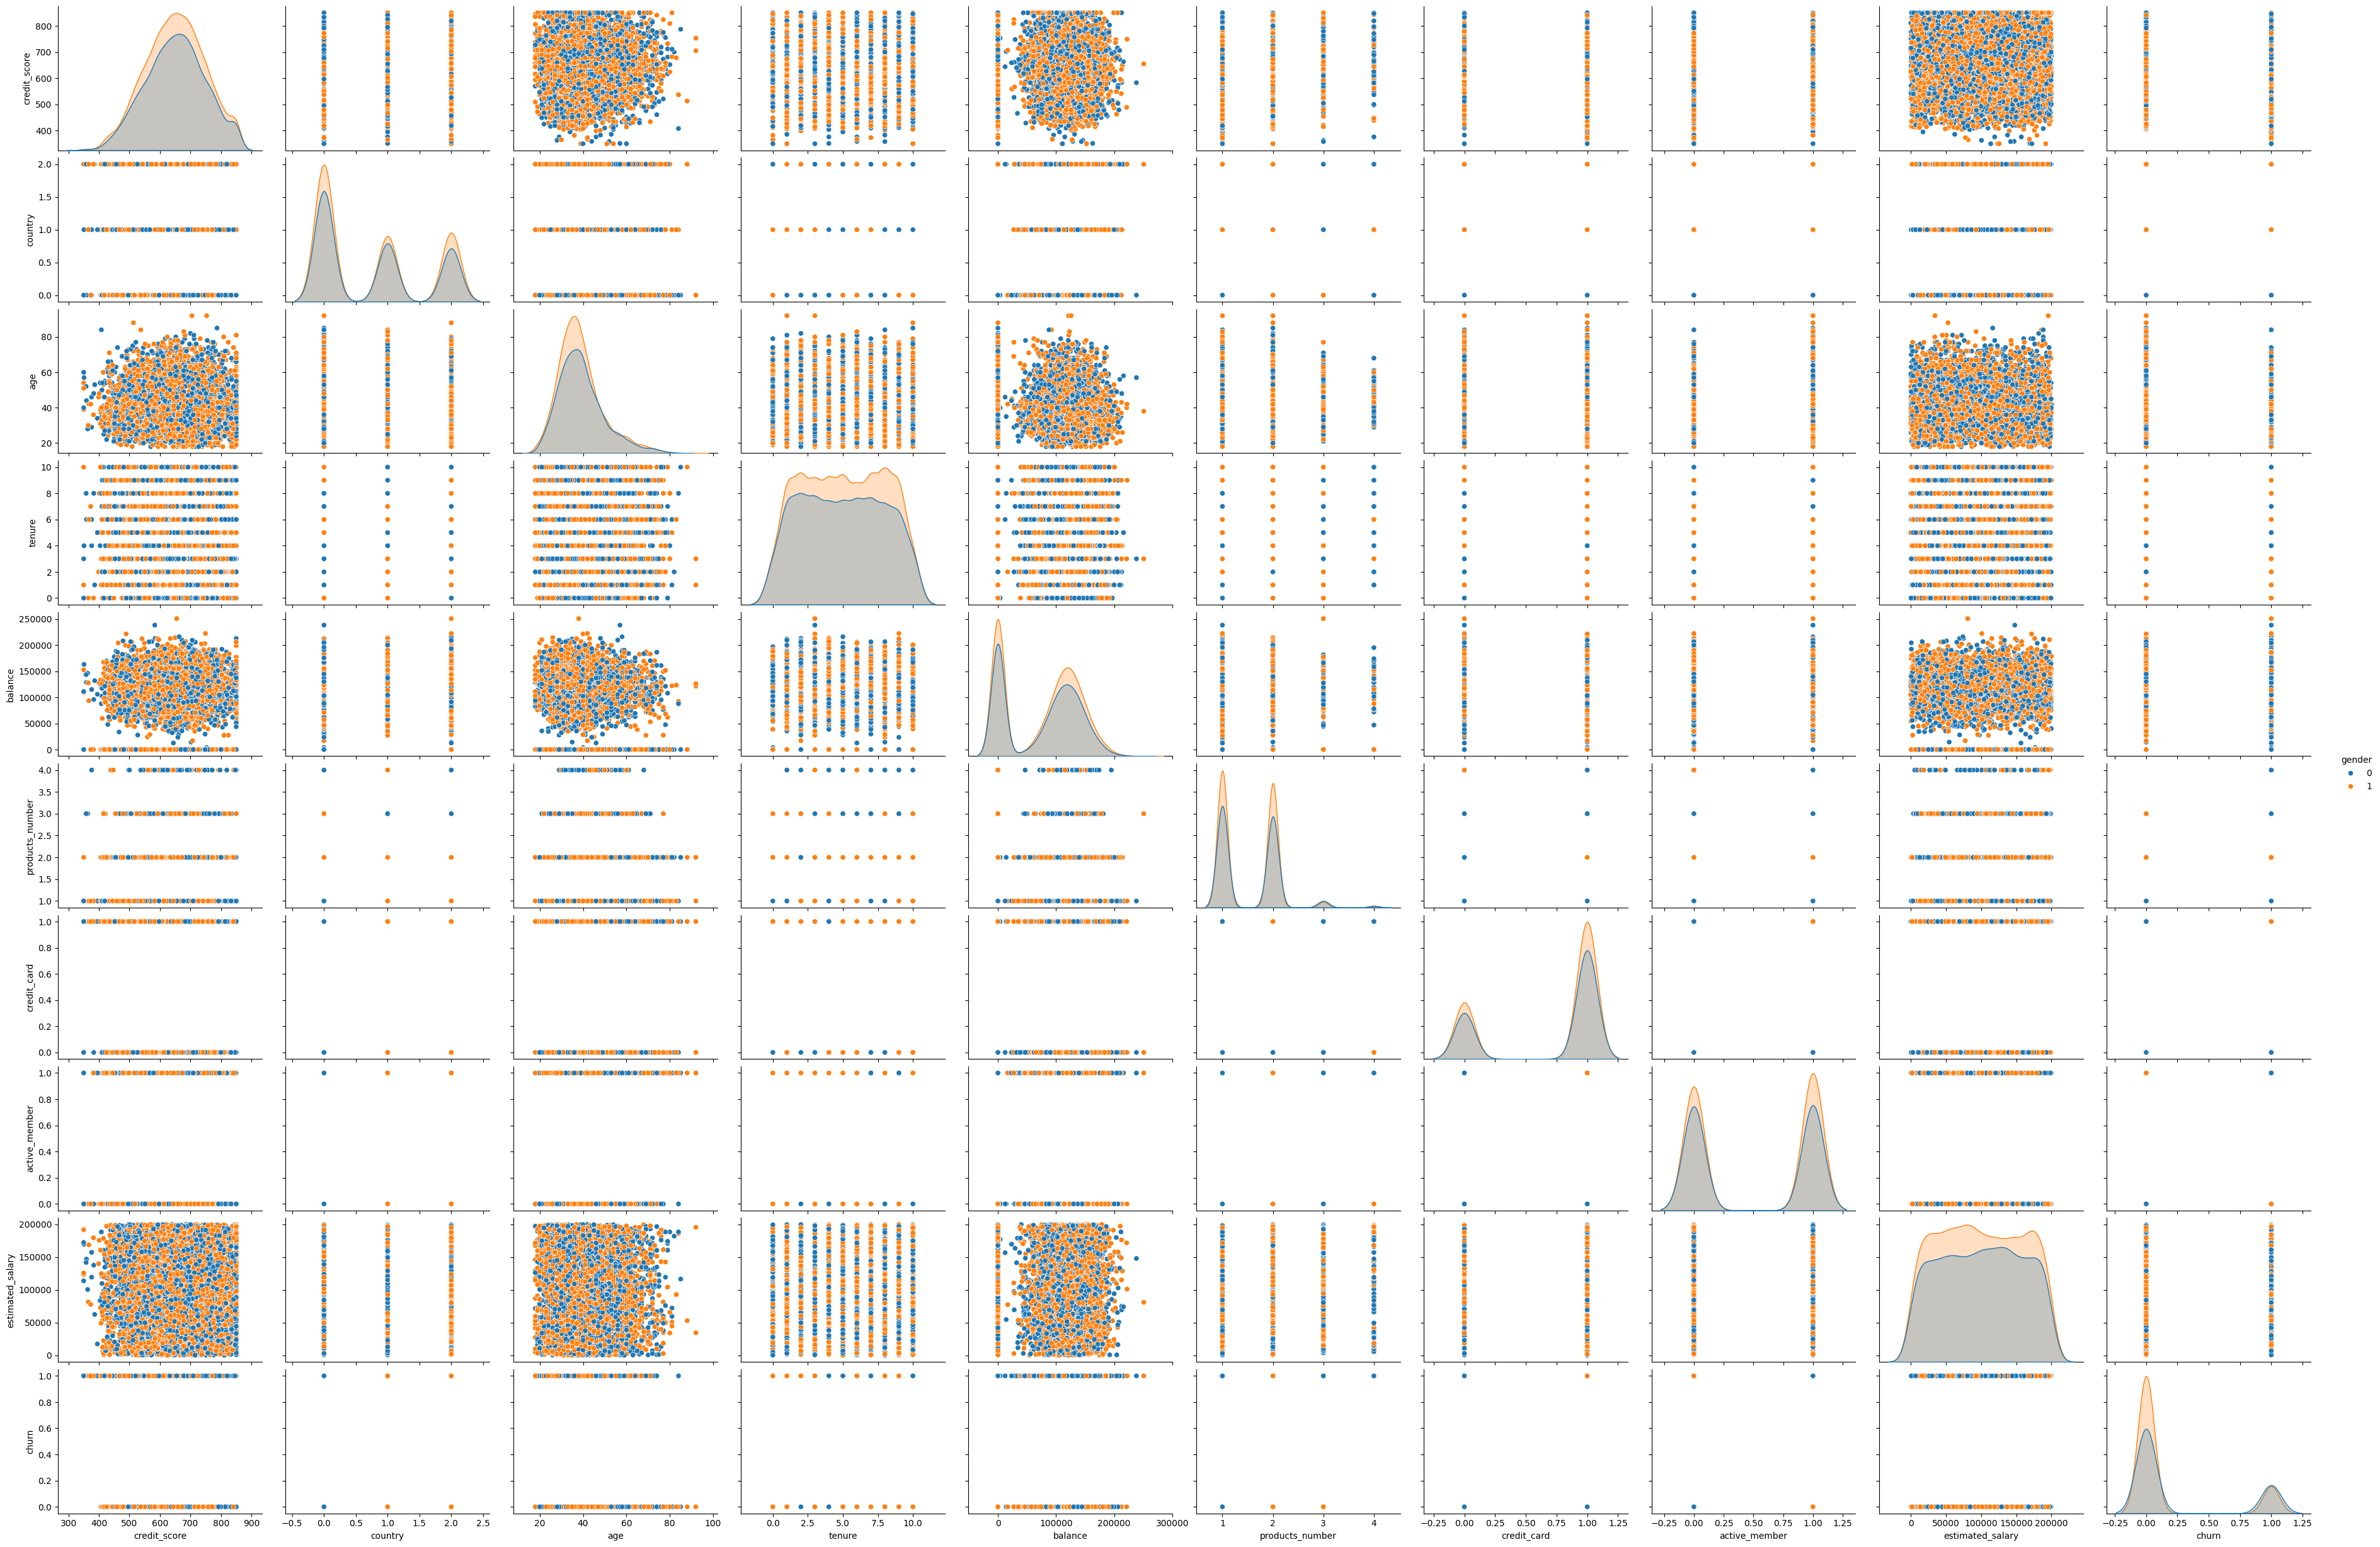

In [6]:
sns.pairplot(data, hue='gender', aspect=1.5)
plt.show()

In [7]:
# determining X and y and scaling X
scaler = StandardScaler()

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X = scaler.fit_transform(X)
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Distinguishing the most important features using Random Forest

In [9]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) ---> %s" % (f + 1, indices[f], importances[indices[f]], data.columns[indices[f]]))

Feature ranking:
1. feature 3 (0.417635) ---> age
2. feature 6 (0.349197) ---> products_number
3. feature 8 (0.103709) ---> active_member
4. feature 5 (0.045012) ---> balance
5. feature 1 (0.027156) ---> country
6. feature 2 (0.018910) ---> gender
7. feature 0 (0.017577) ---> credit_score
8. feature 9 (0.013595) ---> estimated_salary
9. feature 4 (0.006333) ---> tenure
10. feature 7 (0.000876) ---> credit_card


### Making the model without feature selection

In [10]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss=BinaryCrossentropy())

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 733us/step - loss: 0.4774
Epoch 2/100
250/250 [==============================] - 0s 689us/step - loss: 0.4302
Epoch 3/100
250/250 [==============================] - 0s 697us/step - loss: 0.4161
Epoch 4/100
250/250 [==============================] - 0s 688us/step - loss: 0.4030
Epoch 5/100
250/250 [==============================] - 0s 707us/step - loss: 0.3914
Epoch 6/100
250/250 [==============================] - 0s 693us/step - loss: 0.3796
Epoch 7/100
250/250 [==============================] - 0s 721us/step - loss: 0.3690
Epoch 8/100
250/250 [==============================] - 0s 696us/step - loss: 0.3608
Epoch 9/100
250/250 [==============================] - 0s 692us/step - loss: 0.3543
Epoch 10/100
250/250 [==============================] - 0s 686us/step - loss: 0.3504
Epoch 11/100
250/250 [==============================] - 0s 691us/step - loss: 0.3472
Epoch 12/100
250/250 [==============================] - 0s 709us/step - lo

In [11]:
yhat = model.predict(X_test)
yhat

63/63 [==============================] - 0s 735us/step


array([[0.07737751],
       [0.01510618],
       [0.04561779],
       ...,
       [0.6188564 ],
       [0.13206625],
       [0.3926029 ]], dtype=float32)

In [12]:
def my_func(x):
    # Define your function here
    if x > 0.5:
        return 1
    else:
        return 0
    
my_vectorized_func = np.vectorize(my_func)
result = my_vectorized_func(yhat)

result = result.flatten()
yhat = result

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 173  220]
 [  65 1542]]


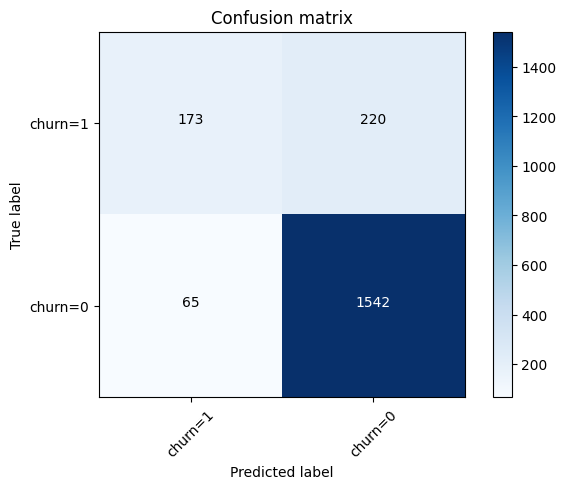

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [15]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### Solving being an imbalanced dataset problem with SMOTETomek

In [16]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

In [18]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss=BinaryCrossentropy())

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
344/344 [==============================] - 1s 739us/step - loss: 0.5767
Epoch 2/100
344/344 [==============================] - 0s 740us/step - loss: 0.4894
Epoch 3/100
344/344 [==============================] - 0s 714us/step - loss: 0.4593
Epoch 4/100
344/344 [==============================] - 0s 720us/step - loss: 0.4447
Epoch 5/100
344/344 [==============================] - 0s 729us/step - loss: 0.4358
Epoch 6/100
344/344 [==============================] - 0s 745us/step - loss: 0.4293
Epoch 7/100
344/344 [==============================] - 0s 738us/step - loss: 0.4242
Epoch 8/100
344/344 [==============================] - 0s 735us/step - loss: 0.4203
Epoch 9/100
344/344 [==============================] - 0s 731us/step - loss: 0.4172
Epoch 10/100
344/344 [==============================] - 0s 728us/step - loss: 0.4134
Epoch 11/100
344/344 [==============================] - 0s 751us/step - loss: 0.4108
Epoch 12/100
344/344 [==============================] - 0s 720us/step - lo

In [19]:
yhat = model.predict(X_test)
yhat

148/148 [==============================] - 0s 656us/step


array([[0.21],
       [0.04],
       [0.  ],
       ...,
       [0.08],
       [0.62],
       [0.99]], dtype=float32)

In [20]:
def my_func(x):
    # Define your function here
    if x > 0.5:
        return 1
    else:
        return 0
    
my_vectorized_func = np.vectorize(my_func)
result = my_vectorized_func(yhat)

result = result.flatten()
yhat = result

Confusion matrix, without normalization
[[1900  431]
 [ 398 1976]]


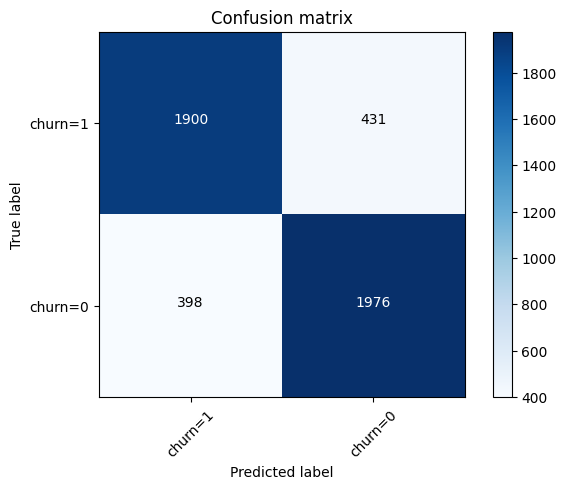

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2374
           1       0.83      0.82      0.82      2331

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



### Making the model with feature selection and also using SMOTETomek

In [23]:
columns = ['credit_score','country','gender','tenure','credit_card','estimated_salary']
newdata = data.drop(columns=columns, axis=1)

X = newdata.iloc[:,:-1].values
y = newdata.iloc[:,-1].values
X = scaler.fit_transform(X)

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

In [25]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss=BinaryCrossentropy())

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
323/323 [==============================] - 1s 740us/step - loss: 0.5603
Epoch 2/100
323/323 [==============================] - 0s 733us/step - loss: 0.4892
Epoch 3/100
323/323 [==============================] - 0s 794us/step - loss: 0.4625
Epoch 4/100
323/323 [==============================] - 0s 735us/step - loss: 0.4513
Epoch 5/100
323/323 [==============================] - 0s 722us/step - loss: 0.4455
Epoch 6/100
323/323 [==============================] - 0s 728us/step - loss: 0.4429
Epoch 7/100
323/323 [==============================] - 0s 720us/step - loss: 0.4412
Epoch 8/100
323/323 [==============================] - 0s 716us/step - loss: 0.4393
Epoch 9/100
323/323 [==============================] - 0s 747us/step - loss: 0.4390
Epoch 10/100
323/323 [==============================] - 0s 741us/step - loss: 0.4379
Epoch 11/100
323/323 [==============================] - 0s 711us/step - loss: 0.4372
Epoch 12/100
323/323 [==============================] - 0s 717us/step - lo

In [26]:
yhat = model.predict(X_test)
yhat

139/139 [==============================] - 0s 675us/step


array([[0.93],
       [0.84],
       [0.48],
       ...,
       [0.71],
       [0.5 ],
       [0.14]], dtype=float32)

In [27]:
def my_func(x):
    # Define your function here
    if x > 0.5:
        return 1
    else:
        return 0
    
my_vectorized_func = np.vectorize(my_func)
result = my_vectorized_func(yhat)

result = result.flatten()
yhat = result

Confusion matrix, without normalization
[[1657  529]
 [ 415 1824]]


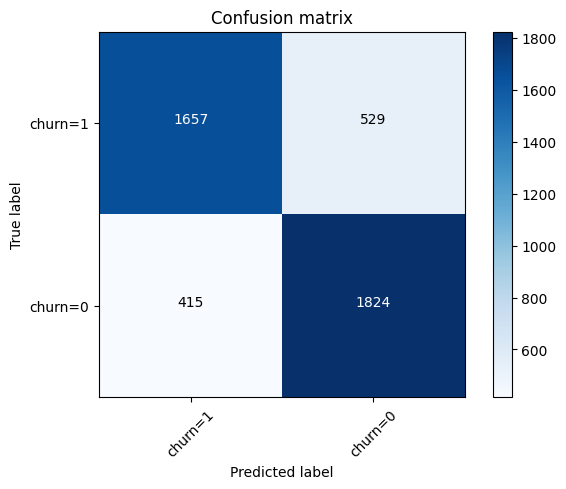

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [29]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2239
           1       0.80      0.76      0.78      2186

    accuracy                           0.79      4425
   macro avg       0.79      0.79      0.79      4425
weighted avg       0.79      0.79      0.79      4425



## We can see that our Deep Learning model reached a better accuracy with SMOTETomek and with all the features included. For reaching a better accuracy we can try different unit counts and changing the activation function!